<h1 align="center"> Correlation Analysis </h1>
<h3 align="center"> IST 5520: Data Science and Machine Learning with Python </h3>
<h3 align="center"> By: Langtao Chen </h3>
<h3 align="center"> Last Update: 9/27/2022 </h3>

In [4]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We use the Toyota Corolla dataset to show how to use tabular methods in Pandas.

In [7]:
dat = pd.read_csv("../ToyotaCorolla.csv")
dat.sample(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
984,9450,63,45000,Petrol,110,1,0,1600,4,1035
1407,8250,69,44826,Petrol,110,0,0,1600,5,1075
207,10950,43,85017,Petrol,97,0,0,1400,5,1060
1014,10450,65,36000,Petrol,110,1,0,1600,3,1065
828,9950,68,68865,Petrol,110,1,0,1600,3,1065
183,21500,2,15,Petrol,110,1,0,1600,5,1130
254,9940,39,53644,Petrol,110,1,0,1600,5,1075
167,20950,14,5278,Petrol,110,1,1,1600,4,1150
390,7750,55,137000,Diesel,72,1,0,2000,5,1135
736,9250,68,84482,Petrol,110,1,0,1600,5,1075


## 1. Correlation Table

We can call the corr() method of the DataFrame object to calculate pairwise correlations between variables.

In [8]:
dat.corr(method='pearson')

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.108905,0.033081,0.165067,0.185326,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.108150,0.031717,-0.133182,-0.148359,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.080503,-0.081854,0.302150,-0.036197,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.058712,0.013144,0.050884,0.092424,0.089614
MetColor,0.108905,-0.108150,-0.080503,0.058712,1.000000,-0.019335,0.034921,0.085243,0.057929
Automatic,0.033081,0.031717,-0.081854,0.013144,-0.019335,1.000000,-0.069321,-0.027654,0.057249
CC,0.165067,-0.133182,0.302150,0.050884,0.034921,-0.069321,1.000000,0.126768,0.651450
Doors,0.185326,-0.148359,-0.036197,0.092424,0.085243,-0.027654,0.126768,1.000000,0.302618
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057929,0.057249,0.651450,0.302618,1.000000


The pandas corr() method does not tell us the p-values. To show the p-value, we can use the scipy.stats.pearsonr() method.

In [4]:
import scipy as sp

In [5]:
sp.stats.pearsonr(dat['Price'],dat['Weight'])

PearsonRResult(statistic=0.5811975886422491, pvalue=1.6304869326484818e-130)

The correlation between Price and Weight is 0.58. P-value < 0.001 means that the correlation is statistically significant.

In [6]:
sp.stats.pearsonr(dat['Price'],dat['Automatic'])

PearsonRResult(statistic=0.03308069441471013, pvalue=0.21026735893253332)

The correlation between Price and Automatic is not statistically significant (p-value = 0.21 > 0.05)

## 2. Correlation Heatmap

We can use seaborn module to create correlation heatmap, which helps us to easily detect high and low pairwise correlations in a dataset.

<AxesSubplot: >

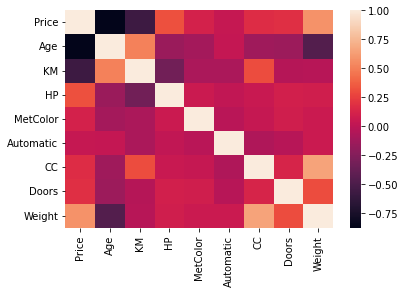

In [7]:
# Compute and plot the pair-wise correlations
sns.heatmap(dat.corr()) 

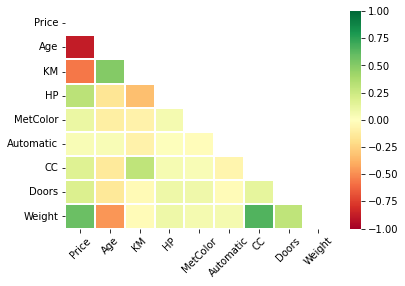

In [8]:
# Another way to further constomize the correlation heatmap

# Create a mask to display only the lower triangle of the matrix
mask = np.zeros_like(dat.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(dat.corr(), cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2)
# cmap is a colormap. For more information, refer to http://matplotlib.org/examples/color/colormaps_reference.html

plt.yticks(rotation=0)
plt.xticks(rotation=45)

# Save the correlation heatmap as a file, set the quality of the figure as dpi=500
plt.savefig('correlation_heatmap.png',dpi=500,bbox_inches='tight')

From the above heatmap, we can easily find that **Age** and **KM** are highly and negatively correlated with **Price**, while **Weight** is highly and positively correlated with **Price**. Among independent variables, **CC** and **Weight** are highly and positively correlated.